In [1]:
import h5py
#file_path = "/home/stefan/STORAGE/Projects2023/ev0000447288.h5"
#file_path = "/Users/username/STORAGE/Project2023"
file_path = 'ev0000447288.h5'

In [7]:
# Open the file
f = h5py.File(file_path, 'r')

In [ ]:
# List all the attributes for the file
list(f.attrs.keys())

In [ ]:
# List of the stations
list(f.keys())

In [ ]:
# Shape of the data for a station
dset = f['IWZH']
dset.shape

In [8]:
dset.shape[1]/(100*60*60*24)

In [9]:
# List of attributes for the station
list(dset.attrs.keys())

In [10]:
# Access the distance in meters of the station from the event
print(dset.attrs['dist_m'],
dset.attrs['ele'],
dset.attrs['lat'],
dset.attrs['lon'])

In [11]:
# Find the distance for all the stations
for k in f.keys():
    print(k,f[k].attrs['dist_m'])

In [13]:
# Extract a portion of the data from numerous stations

import numpy as np

# List of stations to consider
stations_list = ['IWZH', 'KJNH', 'KZMH','YMDH']

# Start and end index values for the portion of data to extract
# 24*3600*100 is 24 hours of data at 100 Hzone day of data.
# this example outputs firt hour of second day:
start = 27*3600*100
end = 28*3600*100

# Number of channels
num_channels = 3

# Allocate the space to save the extracted data
data = np.empty((len(stations_list),num_channels,end-start,))

for i in range(len(stations_list)):
    data[i,0:num_channels,:] = f[stations_list[i]][0:num_channels,start:end]
    
print(data.shape)

(4, 3, 360000)


In [15]:
# Save the extracted data to file
np.save('data.npy', data)

In [35]:
%matplotlib notebook
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


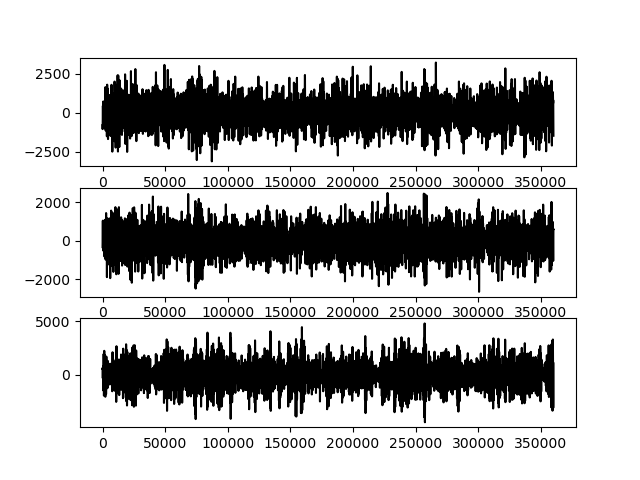

In [14]:
fig,ax=plt.subplots(3)
ax[0].plot(data[0,0,:],'k-')
ax[1].plot(data[0,1,:],'k-')
ax[2].plot(data[0,2,:],'k-')

## Data Proprocess

<IPython.core.display.Javascript object>


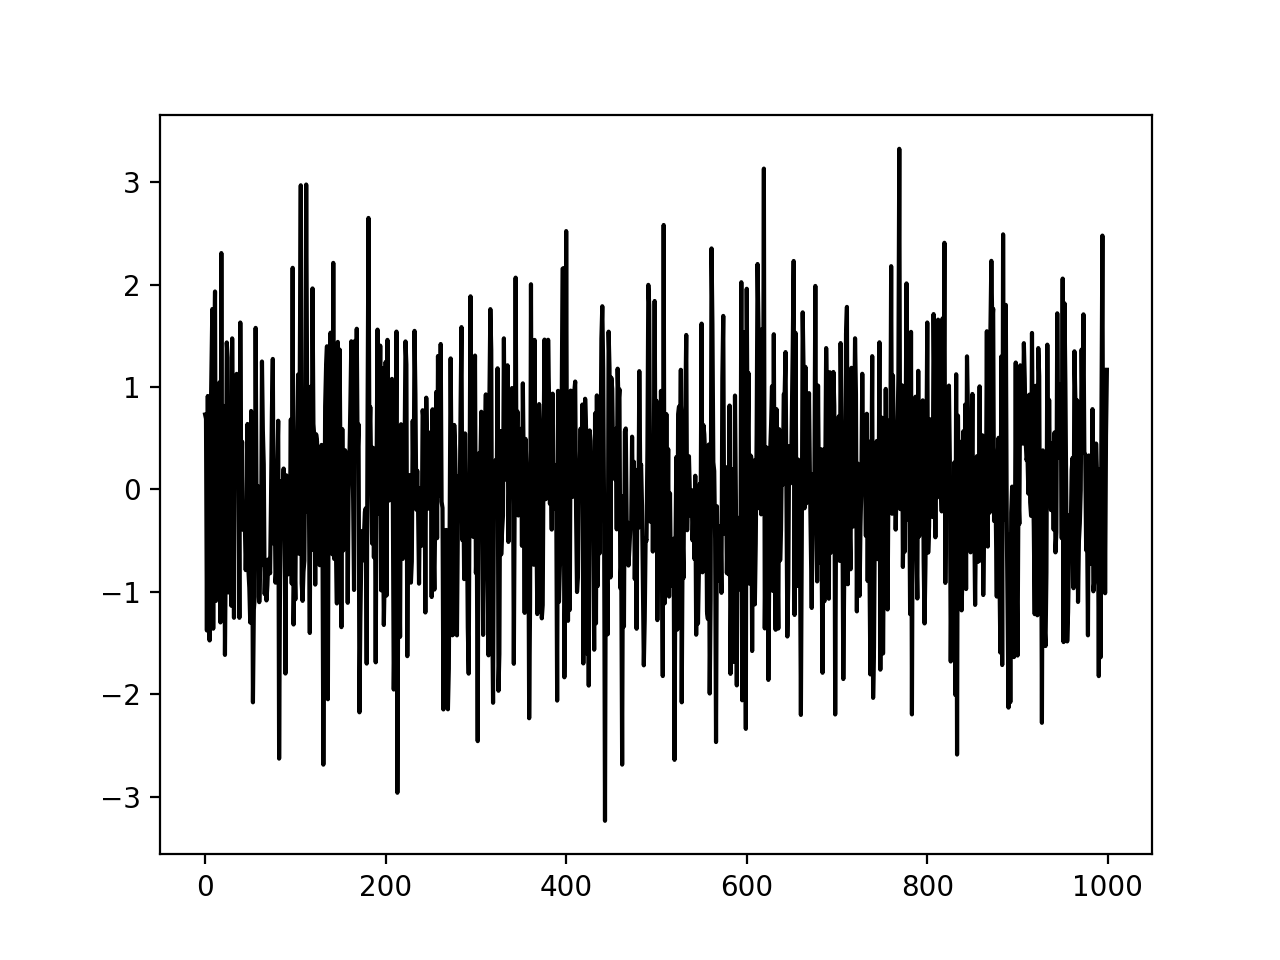

In [36]:
plt.plot(data,'k-')

In [33]:
# 100个数据为例
data = np.random.normal(0,1,1000)
data 

array([ 7.31871609e-01,  6.89778099e-01, -1.37760047e+00,  9.12276109e-01,
       -1.13752099e+00, -1.47478235e+00,  5.24159107e-01,  1.16529281e+00,
        1.76110471e+00, -1.35974088e+00,  1.26334911e+00,  1.93239763e+00,
       -1.08849621e+00, -9.06520324e-01, -2.70043037e-01,  1.25773374e-01,
        1.04621285e+00, -1.29870423e+00,  2.30740062e+00, -6.27781230e-01,
       -8.91538262e-01,  8.14904202e-01, -1.61557337e+00, -5.49130172e-01,
        1.43490237e+00,  1.28719058e+00, -1.00639414e+00,  5.05577142e-01,
        1.02172958e-01, -1.13536391e+00,  1.47460233e+00, -9.82069154e-02,
       -1.25324282e+00,  8.86279424e-01,  4.17242304e-01,  1.12832508e+00,
        1.01341845e-01,  3.38140240e-01, -1.25364698e+00,  1.62947868e+00,
        3.39549902e-02,  4.66605651e-01, -3.93866580e-01, -3.14369464e-01,
       -3.13856504e-01, -7.87737235e-01, -4.25604959e-01,  6.39082168e-01,
       -7.92564077e-01, -9.60815076e-01, -1.29994626e+00,  7.66042770e-01,
        1.60885042e-01, -

In [34]:
# TRAINING DATA
X1 = data[0:20]
y1 = data[21]
X2 = data[1:21]
y2 = data[22]

X100 = data[100:120]
y100 = data[121]
# Y = F(X)

#  TEST DATA
X200 = data[200:220]
y200 = data[221]
y_200_pred = F(X200)
# y_200_pred  y_200

In [ ]:
#  X，y

# f(X) = y

# y = kx+b # x是一系列magnitude y是某个时间段是否发生地震


# train 学习趋势 f(X_train) = y_train


# test  测试学习结果是否好
# f(X_test) = y_predict
# 比较y_predict和真实的y_test的差距
# 如果差距小，证明X_test这个时间段内没有发生地震
# 如果差距大，证明X_test这个时间段内发生了地震

# 
# 1:20->21
# 2:21->22
# 3:22->23
# ...
# 35000: 35020->35021

# 
# f:给连续20个点，他会输出第21个点
# y_predict = f(X_test)
# 比较y_predict和真实的y_test的差距
# 如果差距小，证明X_test这个时间段内没有发生地震
# 如果差距大，证明X_test这个时间段内发生了地震

In [ ]:
#

In [17]:
def generate_time_lags(df, n_lags):
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n = df_n.shift(n)
    df_n = df_n[n_lags:]
    return df_n

In [18]:
df = data[0,0,:]
df_features = generate_time_lags(df, input_dim)

In [19]:
from sklearn.model_selection import train_test_split
m,n = df_features.shape 
m = m-2
percentage = 0.8 
number_of_train = int(m*percentage)
number_of_validation = m-number_of_train

X_train1 = df_features[: ,:n-1]  
y_train1 = df_features[: ,n-1:]
#y_train = np.array(df_features.iloc[:number_of_train ,n-1:])
X_val = df_features[number_of_train:,:n-1]
y_val = df_features[number_of_train: ,n-1:]

m1,n1 = df_features1.shape  
X_test = df_features1[:m1-1,:n1-1]
y_test = df_features1[:m1-1,n1-1:]
X_train  =  pd.concat([X_train1,X_val])
y_train  =  pd.concat([y_train1,y_val])

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

scaler = get_scaler('minmax')
X_train_arr = scaler.fit_transform(X_train)
X_val_arr = scaler.transform(X_val)
X_test_arr = scaler.transform(X_test)

y_train_arr = scaler.fit_transform(y_train)
y_val_arr = scaler.transform(y_val)
y_test_arr = scaler.transform(y_test)

## Use LSTM to train and test  the data

In [23]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(LSTMModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        # Forward propagation by passing in the input, hidden state, and cell state into the model
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out

In [ ]:
model = LSTMModel()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

scaler = get_scaler('minmax')
X_train_arr = scaler.fit_transform(X_train)
X_val_arr = scaler.transform(X_val)
X_test_arr = scaler.transform(X_test)

y_train_arr = scaler.fit_transform(y_train)
y_val_arr = scaler.transform(y_val)
y_test_arr = scaler.transform(y_test)

from torch.utils.data import TensorDataset, DataLoader

batch_size = 8

train_features = torch.Tensor(X_train_arr)
train_targets = torch.Tensor(y_train_arr)
val_features = torch.Tensor(X_val_arr)
val_targets = torch.Tensor(y_val_arr)
test_features = torch.Tensor(X_test_arr)
test_targets = torch.Tensor(y_test_arr)

train = TensorDataset(train_features, train_targets)
val = TensorDataset(val_features, val_targets)
test = TensorDataset(test_features, test_targets)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)
#test_loader_one = DataLoader(test, batch_size=1, shuffle=False, drop_last=True)

import torch.optim as optim

input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 3
dropout = 0.2
n_epochs = 100
learning_rate = 1e-3
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

# you can change "rnn" to "lstm" or "gru" to change to another model
model = get_model('rnn', model_params)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()



#predictions, values = opt.evaluate(test_loader,batch_size ,n_features=input_dim)
predictions, values = opt.evaluate(train_loader,batch_size ,n_features=input_dim)

new_pre = []
new_gt = []
for i  in predictions:
    for j in i:
        new_pre.append(j)

for i  in values:
    for j in i:
        new_gt.append(j)
        
predictions, values = opt.evaluate(val_loader,batch_size ,n_features=input_dim)
'''
for i  in predictions:
    for j in i:
        new_pre.append(j)

for i  in values:
    for j in i:
        new_gt.append(j)
        
predictions, values = opt.evaluate(test_loader,batch_size ,n_features=input_dim)

for i  in predictions:
    for j in i:
        new_pre.append(j)

for i  in values:
    for j in i:
        new_gt.append(j)
        
'''
def plot_influence(new_pre,new_gt):
        """The method plots the calculated loss values for training and validation
        """
        plt.plot(new_pre, label="Prediction")
        plt.plot(new_gt, label="True Value")
        plt.legend()
        plt.title("Influence")
        plt.show()
        plt.close()


plot_influence(new_pre,new_gt)

#------model evaluation-------

new_pre = []
new_gt = []
predictions, values = opt.evaluate(test_loader,batch_size ,n_features=input_dim)

for i  in predictions:
    for j in i:
        new_pre.append(j)

for i  in values:
    for j in i:
        new_gt.append(j)
new_pre1 = []
new_gt1 = []
for i in new_pre:
    new_pre1.append(i[0])
for i in new_gt:
    new_gt1.append(i[0])

mae_f,mse_f,rmse_f,r2_f = evaluation_func(new_pre1,new_gt1)
print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

## Use GRU to train and test  the data

In [24]:
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(GRUModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.layer_dim = layer_dim
        self.hidden_dim = hidden_dim

        # GRU layers
        self.gru = nn.GRU(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Forward propagation by passing in the input and hidden state into the model
        out, _ = self.gru(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out

In [ ]:
model = GRUModel()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

scaler = get_scaler('minmax')
X_train_arr = scaler.fit_transform(X_train)
X_val_arr = scaler.transform(X_val)
X_test_arr = scaler.transform(X_test)

y_train_arr = scaler.fit_transform(y_train)
y_val_arr = scaler.transform(y_val)
y_test_arr = scaler.transform(y_test)

from torch.utils.data import TensorDataset, DataLoader

batch_size = 8

train_features = torch.Tensor(X_train_arr)
train_targets = torch.Tensor(y_train_arr)
val_features = torch.Tensor(X_val_arr)
val_targets = torch.Tensor(y_val_arr)
test_features = torch.Tensor(X_test_arr)
test_targets = torch.Tensor(y_test_arr)

train = TensorDataset(train_features, train_targets)
val = TensorDataset(val_features, val_targets)
test = TensorDataset(test_features, test_targets)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)
#test_loader_one = DataLoader(test, batch_size=1, shuffle=False, drop_last=True)

import torch.optim as optim

input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 3
dropout = 0.2
n_epochs = 100
learning_rate = 1e-3
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

# you can change "rnn" to "lstm" or "gru" to change to another model
model = get_model('rnn', model_params)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()



#predictions, values = opt.evaluate(test_loader,batch_size ,n_features=input_dim)
predictions, values = opt.evaluate(train_loader,batch_size ,n_features=input_dim)

new_pre = []
new_gt = []
for i  in predictions:
    for j in i:
        new_pre.append(j)

for i  in values:
    for j in i:
        new_gt.append(j)
        
predictions, values = opt.evaluate(val_loader,batch_size ,n_features=input_dim)
'''
for i  in predictions:
    for j in i:
        new_pre.append(j)

for i  in values:
    for j in i:
        new_gt.append(j)
        
predictions, values = opt.evaluate(test_loader,batch_size ,n_features=input_dim)

for i  in predictions:
    for j in i:
        new_pre.append(j)

for i  in values:
    for j in i:
        new_gt.append(j)
        
'''
def plot_influence(new_pre,new_gt):
        """The method plots the calculated loss values for training and validation
        """
        plt.plot(new_pre, label="Prediction")
        plt.plot(new_gt, label="True Value")
        plt.legend()
        plt.title("Influence")
        plt.show()
        plt.close()


plot_influence(new_pre,new_gt)

#------model evaluation-------

new_pre = []
new_gt = []
predictions, values = opt.evaluate(test_loader,batch_size ,n_features=input_dim)

for i  in predictions:
    for j in i:
        new_pre.append(j)

for i  in values:
    for j in i:
        new_gt.append(j)
new_pre1 = []
new_gt1 = []
for i in new_pre:
    new_pre1.append(i[0])
for i in new_gt:
    new_gt1.append(i[0])

mae_f,mse_f,rmse_f,r2_f = evaluation_func(new_pre1,new_gt1)
print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

## Use RNN to train and test  the data

In [22]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(RNNModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # RNN layers
        self.rnn = nn.RNN(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Forward propagation by passing in the input and hidden state into the model
        out, h0 = self.rnn(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)
        return out

In [ ]:
model = RNNModel()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

scaler = get_scaler('minmax')
X_train_arr = scaler.fit_transform(X_train)
X_val_arr = scaler.transform(X_val)
X_test_arr = scaler.transform(X_test)

y_train_arr = scaler.fit_transform(y_train)
y_val_arr = scaler.transform(y_val)
y_test_arr = scaler.transform(y_test)

from torch.utils.data import TensorDataset, DataLoader

batch_size = 8

train_features = torch.Tensor(X_train_arr)
train_targets = torch.Tensor(y_train_arr)
val_features = torch.Tensor(X_val_arr)
val_targets = torch.Tensor(y_val_arr)
test_features = torch.Tensor(X_test_arr)
test_targets = torch.Tensor(y_test_arr)

train = TensorDataset(train_features, train_targets)
val = TensorDataset(val_features, val_targets)
test = TensorDataset(test_features, test_targets)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)
#test_loader_one = DataLoader(test, batch_size=1, shuffle=False, drop_last=True)

import torch.optim as optim

input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 3
dropout = 0.2
n_epochs = 100
learning_rate = 1e-3
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

# you can change "rnn" to "lstm" or "gru" to change to another model
model = get_model('rnn', model_params)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()



#predictions, values = opt.evaluate(test_loader,batch_size ,n_features=input_dim)
predictions, values = opt.evaluate(train_loader,batch_size ,n_features=input_dim)

new_pre = []
new_gt = []
for i  in predictions:
    for j in i:
        new_pre.append(j)

for i  in values:
    for j in i:
        new_gt.append(j)
        
predictions, values = opt.evaluate(val_loader,batch_size ,n_features=input_dim)
'''
for i  in predictions:
    for j in i:
        new_pre.append(j)

for i  in values:
    for j in i:
        new_gt.append(j)
        
predictions, values = opt.evaluate(test_loader,batch_size ,n_features=input_dim)

for i  in predictions:
    for j in i:
        new_pre.append(j)

for i  in values:
    for j in i:
        new_gt.append(j)
        
'''
def plot_influence(new_pre,new_gt):
        """The method plots the calculated loss values for training and validation
        """
        plt.plot(new_pre, label="Prediction")
        plt.plot(new_gt, label="True Value")
        plt.legend()
        plt.title("Influence")
        plt.show()
        plt.close()


plot_influence(new_pre,new_gt)

#------model evaluation-------

new_pre = []
new_gt = []
predictions, values = opt.evaluate(test_loader,batch_size ,n_features=input_dim)

for i  in predictions:
    for j in i:
        new_pre.append(j)

for i  in values:
    for j in i:
        new_gt.append(j)
new_pre1 = []
new_gt1 = []
for i in new_pre:
    new_pre1.append(i[0])
for i in new_gt:
    new_gt1.append(i[0])

mae_f,mse_f,rmse_f,r2_f = evaluation_func(new_pre1,new_gt1)
print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)